In [249]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [250]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]
df.head()
X[40]


-1.338637782023097

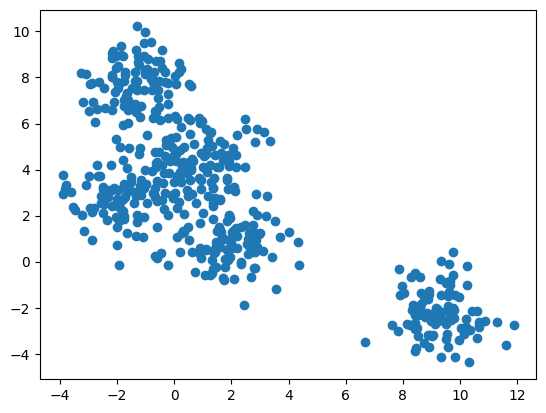

In [251]:
plt.scatter(X, Y)

In [252]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [253]:
def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    dist = ((P1.x - P2.x)**2 + (P1.y - P2.y)**2)**0.5
    return dist


def Mean(AP):
    ### Write code to find centroid of an group of points
    n = len(AP)
    x = 0
    y = 0
    for i in range (n) : 
        x = x + AP[i].x
        y = y + AP[i].y
    return Point(x/n, y/n)

# A = [Point(0,0), Point(1,1), Point(2,2), Point(3,3)]
# print(Mean(A).x, Mean(A).y)    

In [254]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP   
    n = len(AP)
    dist = Distance(P, AP[0])
    out = 0
    for i in range(n) : 
        if (Distance(P, AP[i]) < dist) : 
            dist = Distance(P, AP[i])
            out = i
        else : continue
    return AP[out]

# A = [Point(0,0), Point(1,1), Point(2,2), Point(3,3)]
# print(MinPoint(Point(3.2,1.2), A).x, MinPoint(Point(3.2,1.2), A).y) 

In [255]:
def equality(A1, A2):
    if (len(A1) != len(A2)) : 
        return 0
    else : 
        n = len(A1)
        flag = 1
        for i in range(n) :
            if (A1[i].x != A2[i].x or A1[i].y != A2[i].y) :
                flag = 0
                break
            else : continue
        return flag
    ### Check if A1 and A2 arrays are same or not(same values)

A = [Point(0,0), Point(1,1), Point(2,2), Point(3,3)]
B = [Point(0,0), Point(1,1), Point(2,2), Point(3,3)]
print(equality(A, B))

1


In [256]:
def makedict(X, Y, KM) : 
    D = {}
    for j in range (len(KM)) :
        D[KM[j]] = []
    for i in range(len(X)) : 
        t = MinPoint(Point(X[i], Y[i]), KM)
        D[t].append(Point(X[i], Y[i]))
    return D


def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    n = len(X)
    KMi = []
    KM_prev = []
    KM = []
    init = np.random.randint(0, n, size=k)
    for i in range(k) : 
        KMi.append(Point(X[init[i]], Y[init[i]]))
        # print(init[i], X[init[i]], Y[init[i]])
    KM_prev = KMi.copy()
    KM = KMi.copy()
    D = makedict(X, Y, KM)
    iters = 0
    while(equality(KM, KM_prev) == 0 or iters == 0) :
        iters = iters + 1
        KM_prev = KM.copy()
        for i in range(k) :
            KM[i] = Mean(D[KM_prev[i]])
            # print(KM[i].x, KM_prev[i].x)
        D = makedict(X, Y, KM)
    # print(iters)
    return D, KM
    # return [kM, kMi, D]

# print((kMeans(X, Y, 6)[2]).x, (kMeans(X, Y, 6)[2]).y)
d, KM = kMeans(X, Y, 6)
for i in range(6) :
    print(len(d[KM[i]]))

31
106
29
186
108
40


In [257]:
def Elbow(X, Y):
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method
    dist = []
    for i in range(10) :
        if (i == 0) : continue
        d, KM = kMeans(X, Y, i) 
        x = 0
        for j in range(i) : 
            for k in range (len(d[KM[j]])) : 
                x = x + Distance(KM[j], d[KM[j]][k])
        dist.append(x)
    return dist

y = Elbow(X, Y)

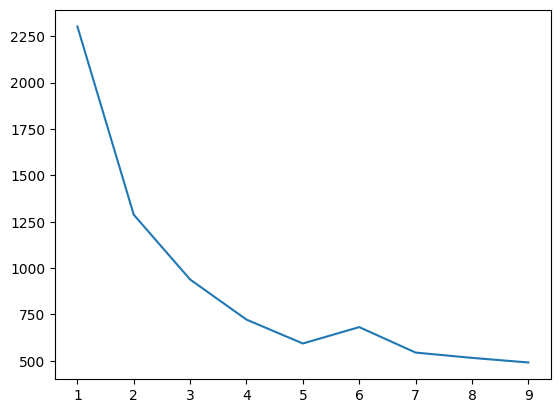

In [195]:
### Here, plot the elbow curve
# plt.plot(np.lin)
x = np.array(range(1, 10))
plt.plot(x, y)

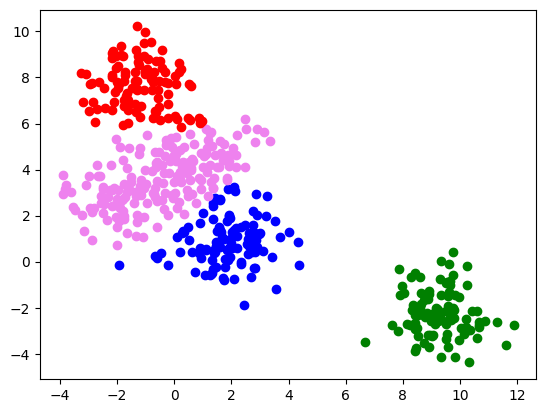

In [264]:
### Here, plot the scatter plot with each point colour coded with the respective groups. And, with initial k centroids, and final k centroids
cluster_dict_x = {0 : [], 1 : [], 2 : [], 3 : []}
cluster_dict_y = {0 : [], 1 : [], 2 : [], 3 : []}
d, KM = kMeans(X, Y, 4)
for i in range(4) : 
    for j in range(len(d[KM[i]])):
        cluster_dict_x[i].append(d[KM[i]][j].x)
        cluster_dict_y[i].append(d[KM[i]][j].y)

plt.scatter(cluster_dict_x[0],cluster_dict_y[0], color = "blue")
plt.scatter(cluster_dict_x[1],cluster_dict_y[1], color = "green")
plt.scatter(cluster_dict_x[2],cluster_dict_y[2], color = "violet")
plt.scatter(cluster_dict_x[3],cluster_dict_y[3], color = "red")